<a href="https://colab.research.google.com/drive/1Cuagffqk-eKLMnuLej2aYA2fVVe9jJ36?usp=sharing[link text](https:// [link text](https://))" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By [Ibrahim Sobh](https://www.linkedin.com/in/ibrahim-sobh-phd-8681757/)

## In this code we are going to load pretrained image classification networks 
- ResNet50
- VGG16
- VGG19

## Then using a **pretrained network**, **feature extraction** and visualization is conducted via **t-SNE**

![deepnets](https://imgur.com/nyYh5xH.jpg)


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import backend as K
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


2020-05-10 13:53:24 URL:https://images.immediate.co.uk/production/volatile/sites/4/2018/08/iStock_000044061370_Medium-fa5f8aa.jpg [36921/36921] -> "cat.jpg" [1]


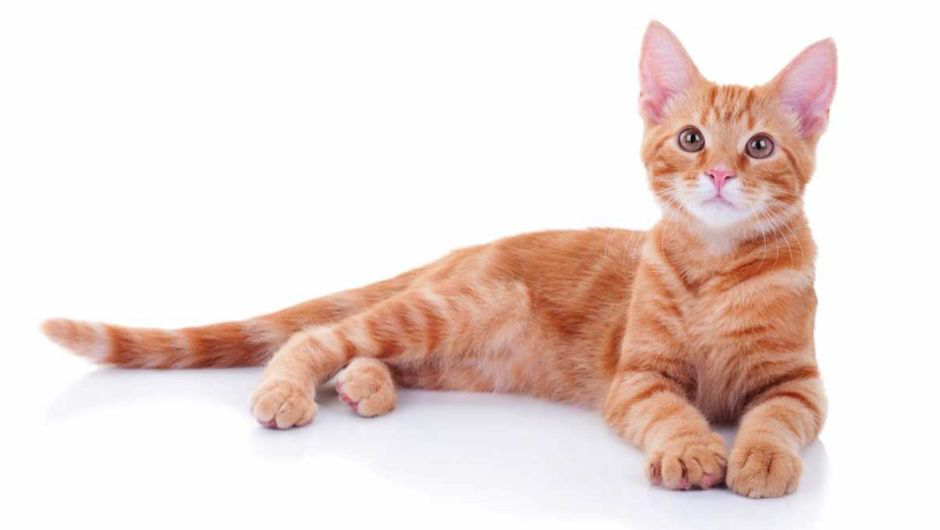

In [0]:
!wget -nv https://images.immediate.co.uk/production/volatile/sites/4/2018/08/iStock_000044061370_Medium-fa5f8aa.jpg -O cat.jpg

img = Image.open('./cat.jpg')
img

## Classify ImageNet classes with ResNet50

In [0]:
model = ResNet50(weights='imagenet')

img_path = './cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
print('image.img_to_array: ', x.shape, np.max(x), np.min(x))
x = np.expand_dims(x, axis=0)
print('expand_dims: ', x.shape, np.max(x), np.min(x))
x = preprocess_input(x)
print('preprocess_input: ', x.shape, np.max(x), np.min(x))
print(model.summary())

image.img_to_array:  (224, 224, 3) 255.0 10.0
expand_dims:  (1, 224, 224, 3) 255.0 10.0
preprocess_input:  (1, 224, 224, 3) 151.061 -110.68
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 6

In [0]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02123045', 'tabby', 0.5295496), ('n02124075', 'Egyptian_cat', 0.25878328), ('n02123159', 'tiger_cat', 0.1167525)]


## Extract features with VGG16

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print(features.shape)

(1, 7, 7, 512)


## Use VGG to extract features for arbitrary CIFAR-10 images 

![CIFAR-10](https://i2.wp.com/appliedmachinelearning.blog/wp-content/uploads/2018/03/cifar2.jpg?resize=427%2C325&ssl=1)

In [0]:
from sklearn.manifold import TSNE

In [0]:
from keras.datasets import cifar10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_test_indx = np.squeeze(y_test)

x_test = x_test[y_test_indx < 3]   
y_test = y_test[y_test_indx < 3] 

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print('y_test.shape:', y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
3000 test samples
y_test.shape: (3000, 1)


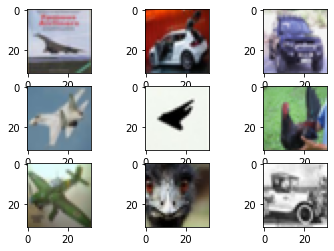

In [0]:
# plot samples 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_test[i])
plt.show()

In [0]:
x = preprocess_input(x_test)

features = model.predict(x)
print(features.shape)
feats = np.squeeze(features)

(3000, 1, 1, 512)


In [0]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, verbose=2).fit_transform(feats)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.140s...
[t-SNE] Computed neighbors for 3000 samples in 8.372s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 56.742189
[t-SNE] Computed conditional probabilities in 0.218s
[t-SNE] Iteration 50: error = 81.6739349, gradient norm = 0.1232494 (50 iterations in 1.698s)
[t-SNE] Iteration 100: error = 82.1897125, gradient norm = 0.0982454 (50 iterations in 1.621s)
[t-SNE] Iteration 150: error = 82.1726074, gradient norm = 0.1074904 (50 iterations in 1.222s)
[t-SNE] Iteration 200: error = 81.8359833, gradient norm = 0.1049426 (50 iterations in 1.132s)
[t-SNE] Iteration 250: error = 82.3714905, gradient norm = 0.0948894 (50 iterations in 1.095s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.371490
[t-SNE] Iteration 300: err

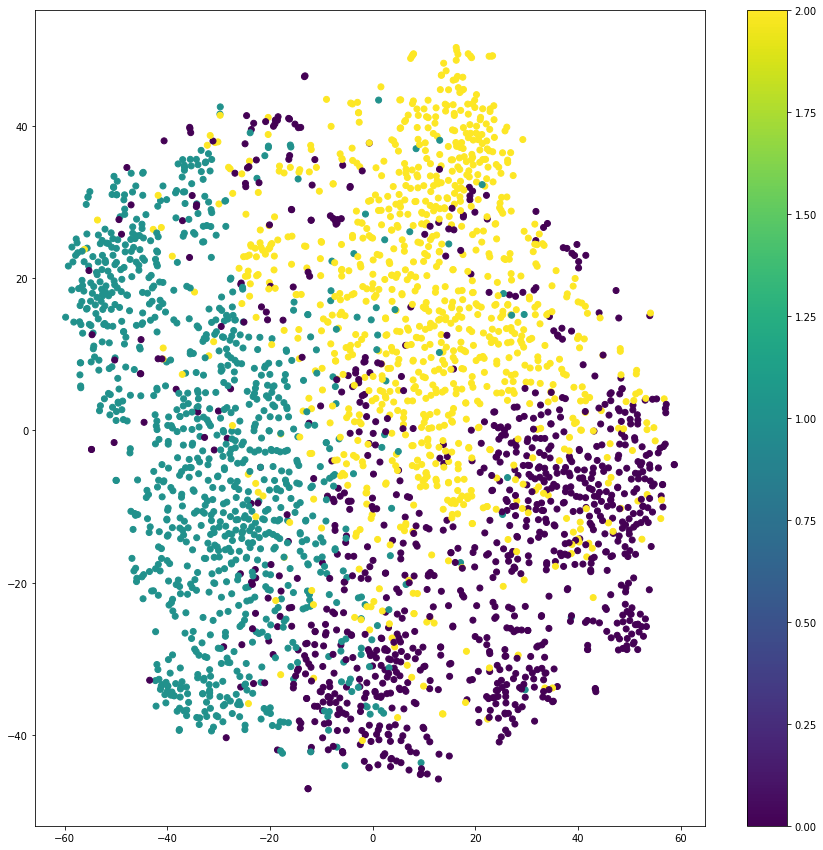

In [0]:
y_test_color = np.squeeze(y_test)

plt.figure(figsize=(15, 15))
plt.scatter(tsne[:, 0], tsne[:, 1], c=y_test_color)

plt.colorbar()
plt.show()

In [0]:
# http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html
def plot_dataset(X, y, X_embedded, name, min_dist=10.0):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(frameon=False)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = np.arange(X_embedded.shape[0])
        np.random.shuffle(indices)
        for i in indices[:5000]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(32, 32, 3)), X_embedded[i])
            ax.add_artist(imagebox)

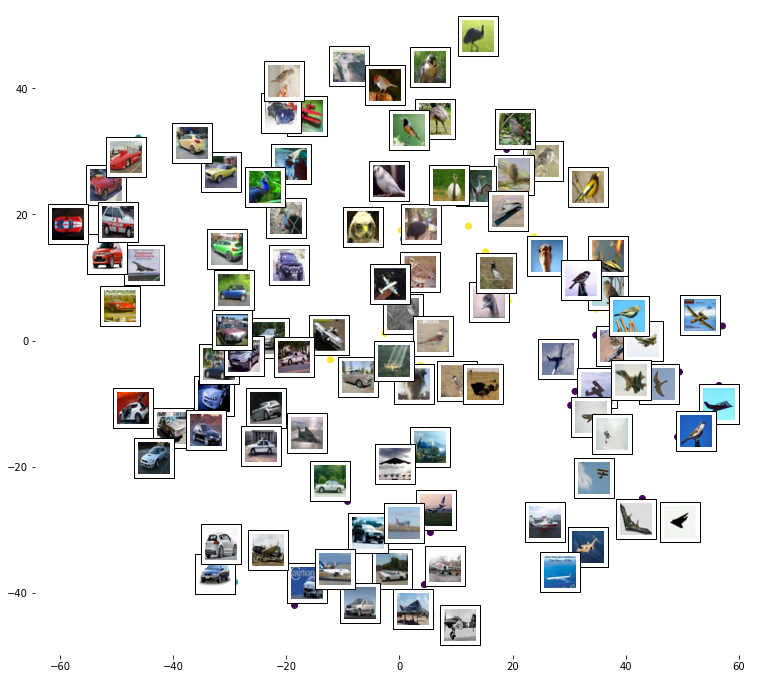

In [0]:
plot_dataset(x_test[:150], y_test_color[:150], tsne[:150], "t-SNE", min_dist=20.0)

## Extract features from an arbitrary intermediate layer with VGG19

In [0]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')

574717952/574710816 [==============================] - 12s 0us/step


In [0]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

In [0]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print(block4_pool_features.shape)

(1, 14, 14, 512)
